In [1]:
from matplotlib import pyplot as plt
import numpy as np
import glob
from PIL import Image, ImageStat

import seaborn as sns

In [2]:

def calculate_mean_std(image_list):
    means = []
    stds = []
    for image_path in image_list:
        image = Image.open(image_path).convert('RGB')
        
        stat = ImageStat.Stat(image)
        means.append(np.array(stat.mean))
        stds.append(np.array(stat.var)**0.5)
    return np.mean(means), np.mean(stds)


In [3]:
image_list = glob.glob('data/images/*')

In [4]:
mean, std = calculate_mean_std(image_list)

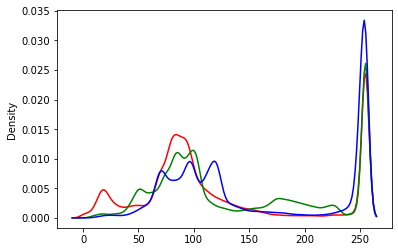

In [6]:
def channel_histogram(image_list):
    red = []
    green = []
    blue = []
    for path in image_list:
        img = np.array(Image.open(path).convert('RGB'))
        R, G, B = img[..., 0], img[..., 1], img[..., 2]
        red.extend(R.flatten().tolist())
        green.extend(G.flatten().tolist())
        blue.extend(B.flatten().tolist())
    
    plt.figure()
    sns.kdeplot(red, color='r')
    sns.kdeplot(green, color='g')
    sns.kdeplot(blue, color='b')
    plt.show()
    # IMPLEMENT THIS FUNCTION

channel_histogram(image_list[:3])